In [ ]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
#time consuming
ox.config(log_console= True, use_cache=True)

/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


##Esfahan

In [ ]:
# Get graph by geocoding
graph = ox.graph_from_place("Isfahan, Iran", network_type="walk")

In [ ]:
# Project graph
graph = ox.project_graph(graph)

In [ ]:
# Simplify to get real intersections only
# (consolidate nodes within a distance from eachother)
graph_simplified = ox.simplification.consolidate_intersections(
    # Graph to simplify
    graph,
    # buffer around each node (project the graph beforehand)
    tolerance=5,
    # Get result as graph (False to get nodes only as gdf)
    rebuild_graph=True,
    # no dead ends
    dead_ends=False,
    # Reconnect (False to get intersections only)
    reconnect_edges=True
)

In [ ]:
# everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_s, edges_s = ox.graph_to_gdfs(graph_simplified)

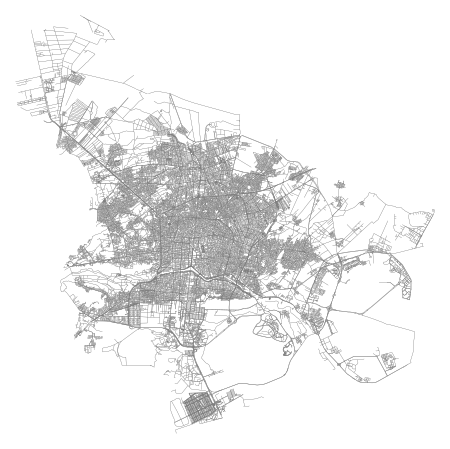

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26c5e83550>)

In [ ]:
# Setup plot
ox.plot_graph(graph, node_size= 0 ,  edge_color= 'gray',
              bgcolor='white', edge_linewidth= 0.2, filepath = '/content/Isfahan_city.png',save=True)

In [ ]:
# Define colors
edgecol = [0.5,0.5,0.5]
nodecol = 'white'
linewidth = 0.5
markersize = 5

# Setup plot
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
fig.set_facecolor('black')

# Plot original graph
edges.plot(ax=ax[0], color=edgecol, linewidth=linewidth)
nodes.plot(ax=ax[0], color=nodecol, markersize=markersize)

# Plot simplified graph
edges_s.plot(ax=ax[1], color=edgecol, linewidth=linewidth)
nodes_s.plot(ax=ax[1], color=nodecol, markersize=markersize)

# Zoom in
plt.setp(ax[0], xlim=(51.6747,51.6558), ylim=(32.6569,32.6478))
plt.setp(ax[1], xlim=(51.6747,51.6558), ylim=(32.6569,32.6478))

# Tight layout
plt.tight_layout()

ox.plot_graph(graph, node_size= 0.3 , edge_color= 'm', edge_color= 'gray',
              bgcolor='white', edge_linewidth= 0.2, filepath = '/content/graphnon_simple.png',save=True)

In [ ]:
# Print info
print(
    'number of nodes:\n\noriginal graph: '+str(len(nodes))
    +'\nsimplified graph: '+str(len(nodes_s))
)

number of nodes:

original graph: 99407
simplified graph: 60880


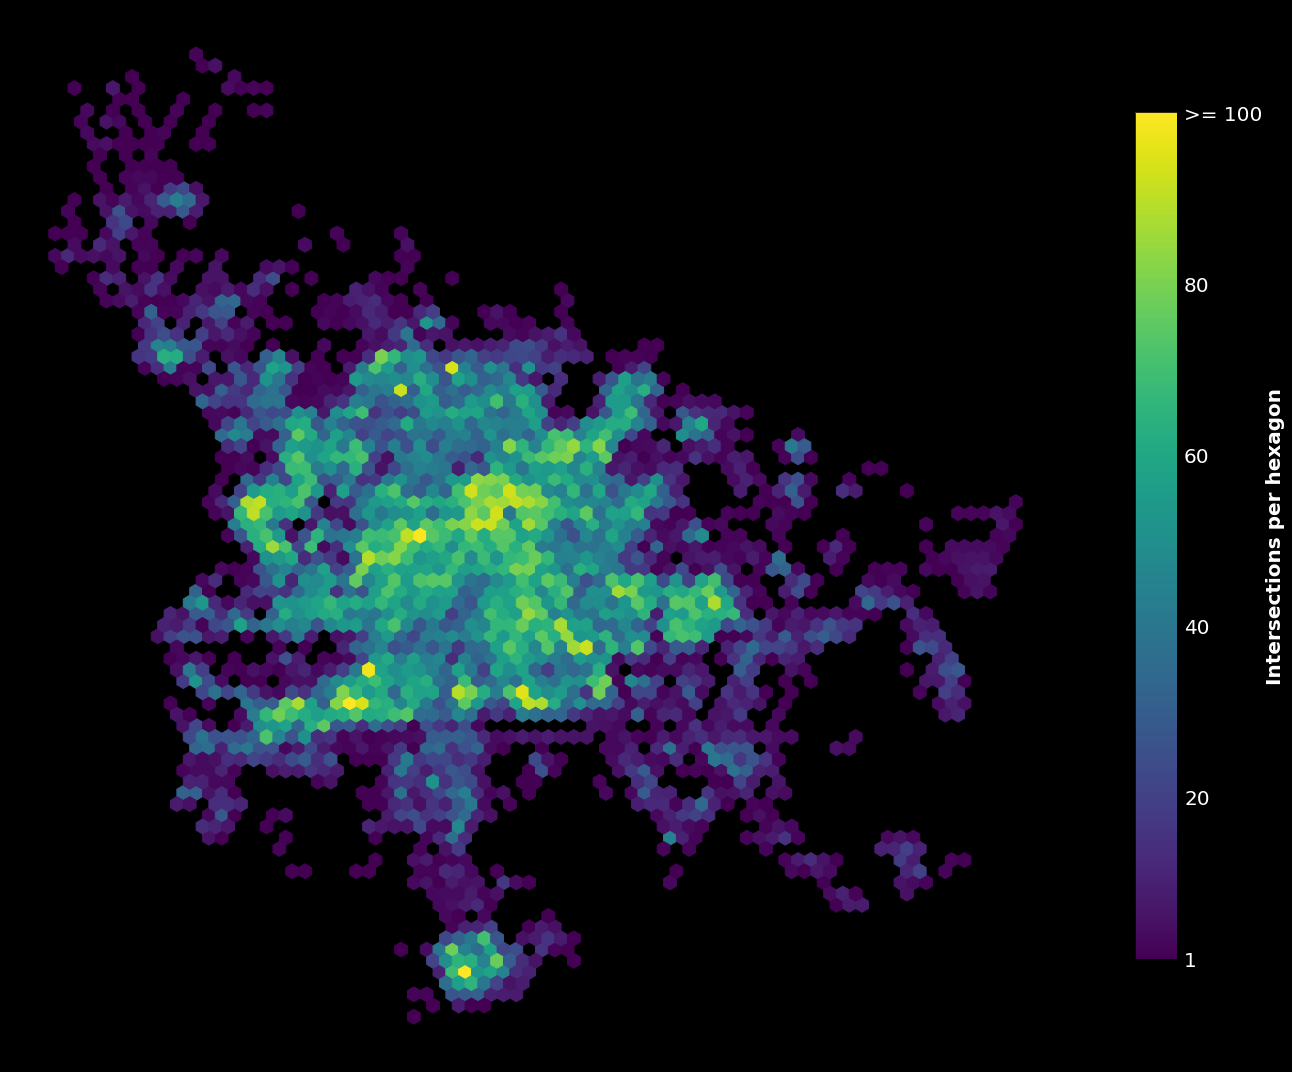

In [ ]:
# Set all text color to white
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot as hexbins
hb = ax.hexbin(
    x=nodes_s['x'],
    y=nodes_s['y'],
    gridsize=75,
    cmap='viridis',
    mincnt=1,
    vmax=100,
)

# Colorbar
cb = plt.colorbar(hb, ax=ax, shrink=0.8, ticks=[1, 20, 40, 60, 80, 100])
cb.ax.tick_params(color='none', labelsize=20)
cb.ax.set_yticklabels(['1', '20', '40', '60', '80', '>= 100'])
cb.set_label('Intersections per hexagon', fontsize=20, fontweight='bold')

# Tight layout
plt.tight_layout()

# Save
plt.savefig('/content/intersection_hexbin.png')

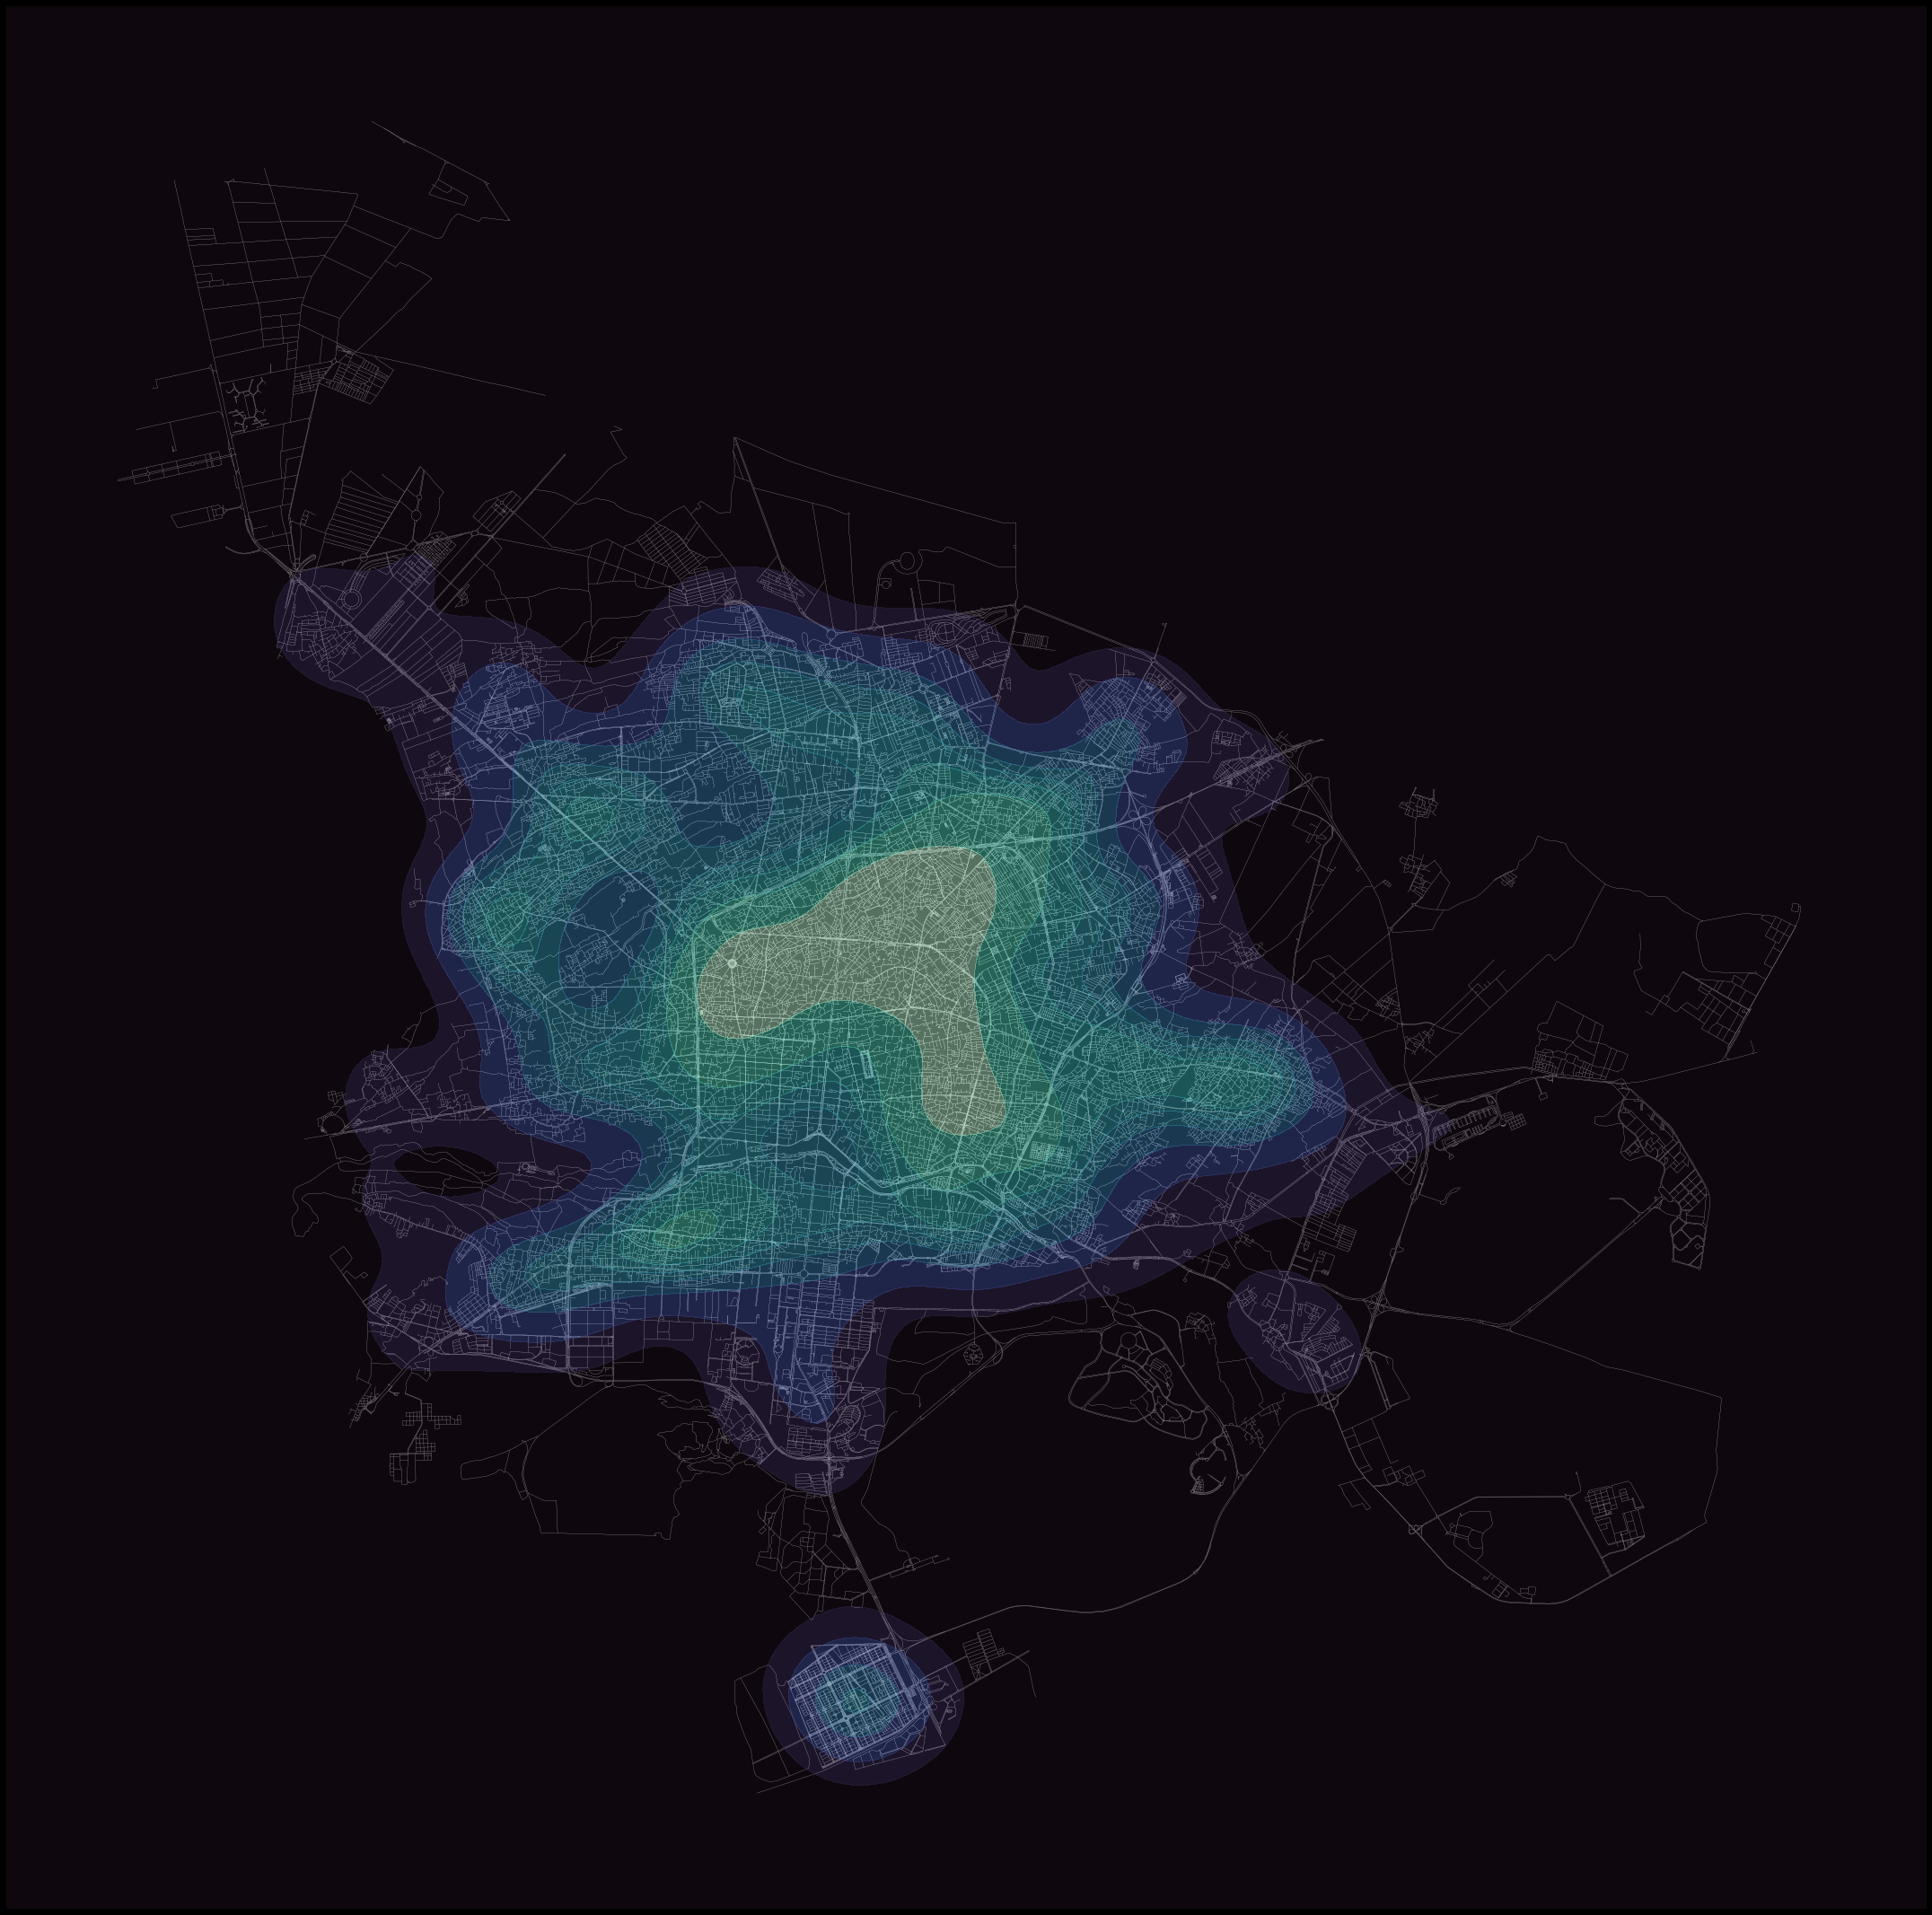

In [ ]:
# Setup plot
#Seaborn’s kernel density estimate (KDE)
fig, ax = plt.subplots(figsize=(30,30))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot streets underneath
edges_s.plot(ax=ax, color=[1,1,1], linewidth=0.2, zorder= 0)

# Plot KDE on top
sns.kdeplot(
    ax=ax,
    data=nodes_s,
    x='x', y='y',
    hue=None,
    fill=True,
    cmap='mako',
    thresh=0,
    levels=10,
    alpha=0.5,
    zorder=10
)

# Tight layout
plt.tight_layout()

##Tehran

In [ ]:
# Get graph by geocoding
graph_tehran = ox.graph_from_place("Tehran, Iran", network_type="walk")

In [ ]:
# Project graph
graph_tehran = ox.project_graph(graph_tehran)

In [ ]:
# Simplify to get real intersections only
# (consolidate nodes within a distance from eachother)
graph_tehran_simplified = ox.simplification.consolidate_intersections(
    # Graph to simplify
    graph_tehran,
    # buffer around each node (project the graph beforehand)
    tolerance=5,
    # Get result as graph (False to get nodes only as gdf)
    rebuild_graph=True,
    # no dead ends
    dead_ends=False,
    # Reconnect (False to get intersections only)
    reconnect_edges=True
)

In [ ]:
# everything to gdfs
nodes_tehran, edges_tehran = ox.graph_to_gdfs(graph_tehran)
nodes_s_tehran, edges_s_tehran = ox.graph_to_gdfs(graph_tehran_simplified)

In [ ]:
nodes_s_tehran

osmid_original              x             y  street_count  \
osmid                                                                        
0        [25920665, 4421793434]  532137.381922  3.950767e+06             0   
1                    1921578857  532108.990099  3.950766e+06             3   
2       [712663582, 2131766629]  532116.773889  3.950860e+06             0   
3                      25920706  533301.675099  3.952319e+06             4   
4                    1656064200  533405.433289  3.952190e+06             3   
...                         ...            ...           ...           ...   
102578              10276015624  530199.985960  3.954616e+06             3   
102579              10554644175  532983.309559  3.959091e+06             3   
102580              10559232774  530347.692160  3.954368e+06             3   
102581              10559232773  530377.189815  3.954371e+06             3   
102582              10563052128  550659.185753  3.956879e+06             3   

              lon        lat highway  ref                        geometry  
osmid                                                                      
0             NaN        NaN     NaN  NaN  POINT (532137.382 3950766.793)  
1       51.354923  35.700300     NaN  NaN  POINT (532108.990 3950766.264)  
2             NaN        NaN     NaN  NaN  POINT (532116.774 3950860.389)  
3       51.368170  35.714262     NaN  NaN  POINT (533301.675 3952319.201)  
4       51.369312  35.713091     NaN  NaN  POINT (533405.433 3952189.658)  
...           ...        ...     ...  ...                             ...  
102578  51.333966  35.735069     NaN  NaN  POINT (530199.986 3954615.831)  
102579  51.364929  35.775329     NaN  NaN  POINT (532983.310 3959091.085)  
102580  51.335590  35.732829     NaN  NaN  POINT (530347.692 3954367.805)  
102581  51.335917  35.732855     NaN  NaN  POINT (530377.190 3954370.834)  
102582  51.560349  35.754637     NaN  NaN  POINT (550659.186 3956879.396)  

[102583 rows x 9 columns]

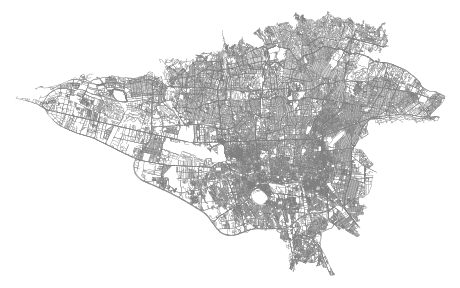

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f685a4aaa90>)

In [ ]:
# Setup plot
ox.plot_graph(graph_tehran, node_size= 0 ,  edge_color= 'gray',
              bgcolor='white', edge_linewidth= 0.2, filepath = '/content/Tehran_city.png',save=True)

In [ ]:
# Print info
print(
    'number of nodes:\n\noriginal graph: '+str(len(nodes_tehran))
    +'\nsimplified graph: '+str(len(nodes_s_tehran))
)

number of nodes:

original graph: 158332
simplified graph: 102583


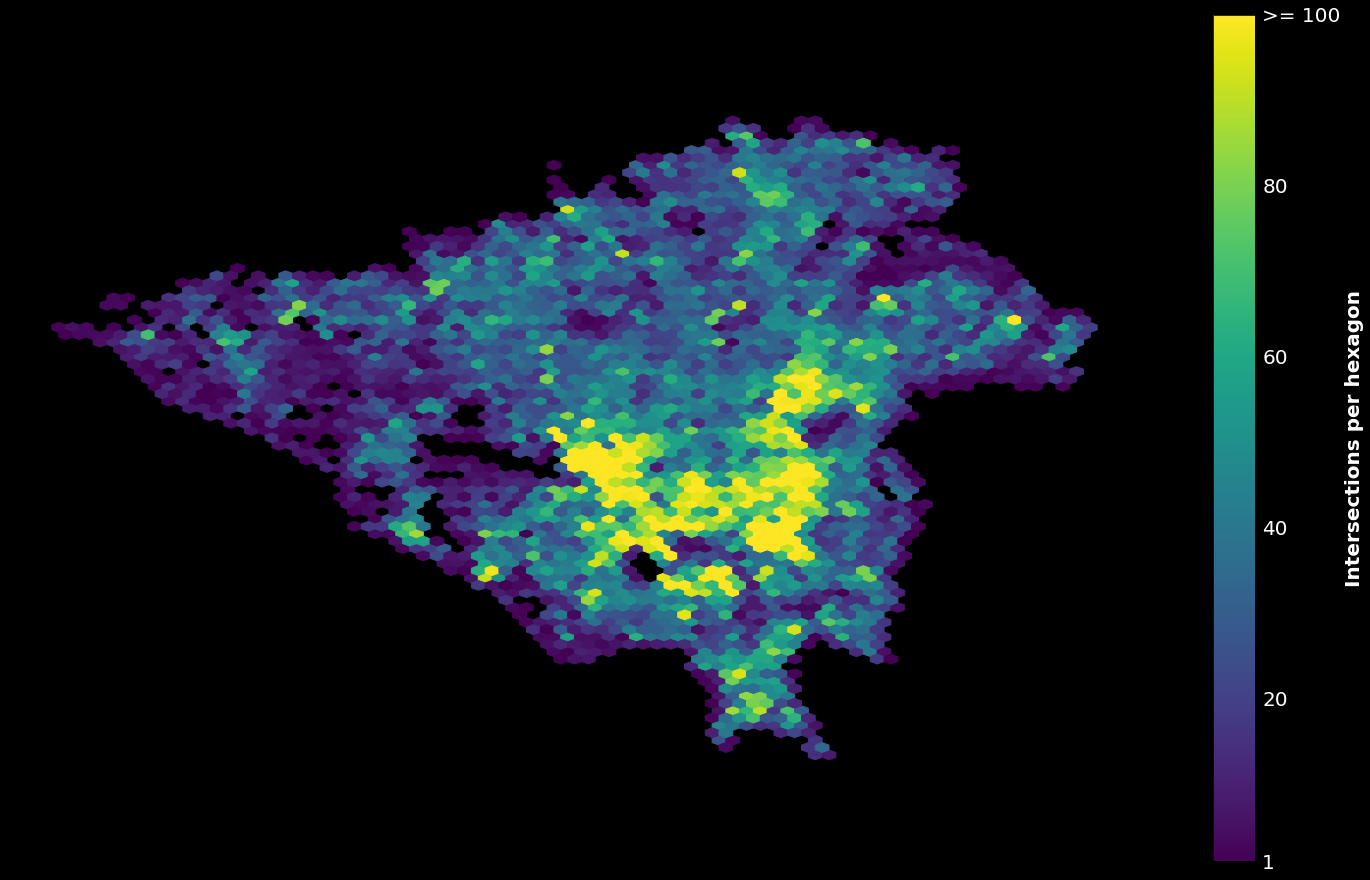

In [ ]:
# Set all text color to white
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot as hexbins
hb = ax.hexbin(
    x=nodes_s_tehran['x'],
    y=nodes_s_tehran['y'],
    gridsize=75,
    cmap='viridis',
    mincnt=1,
    vmax=100,
)

# Colorbar
cb = plt.colorbar(hb, ax=ax, shrink=0.8, ticks=[1, 20, 40, 60, 80, 100])
cb.ax.tick_params(color='none', labelsize=20)
cb.ax.set_yticklabels(['1', '20', '40', '60', '80', '>= 100'])
cb.set_label('Intersections per hexagon', fontsize=20, fontweight='bold')

# Tight layout
plt.tight_layout()

# Save
plt.savefig('/content/intersection_hexbin_tehran.png')

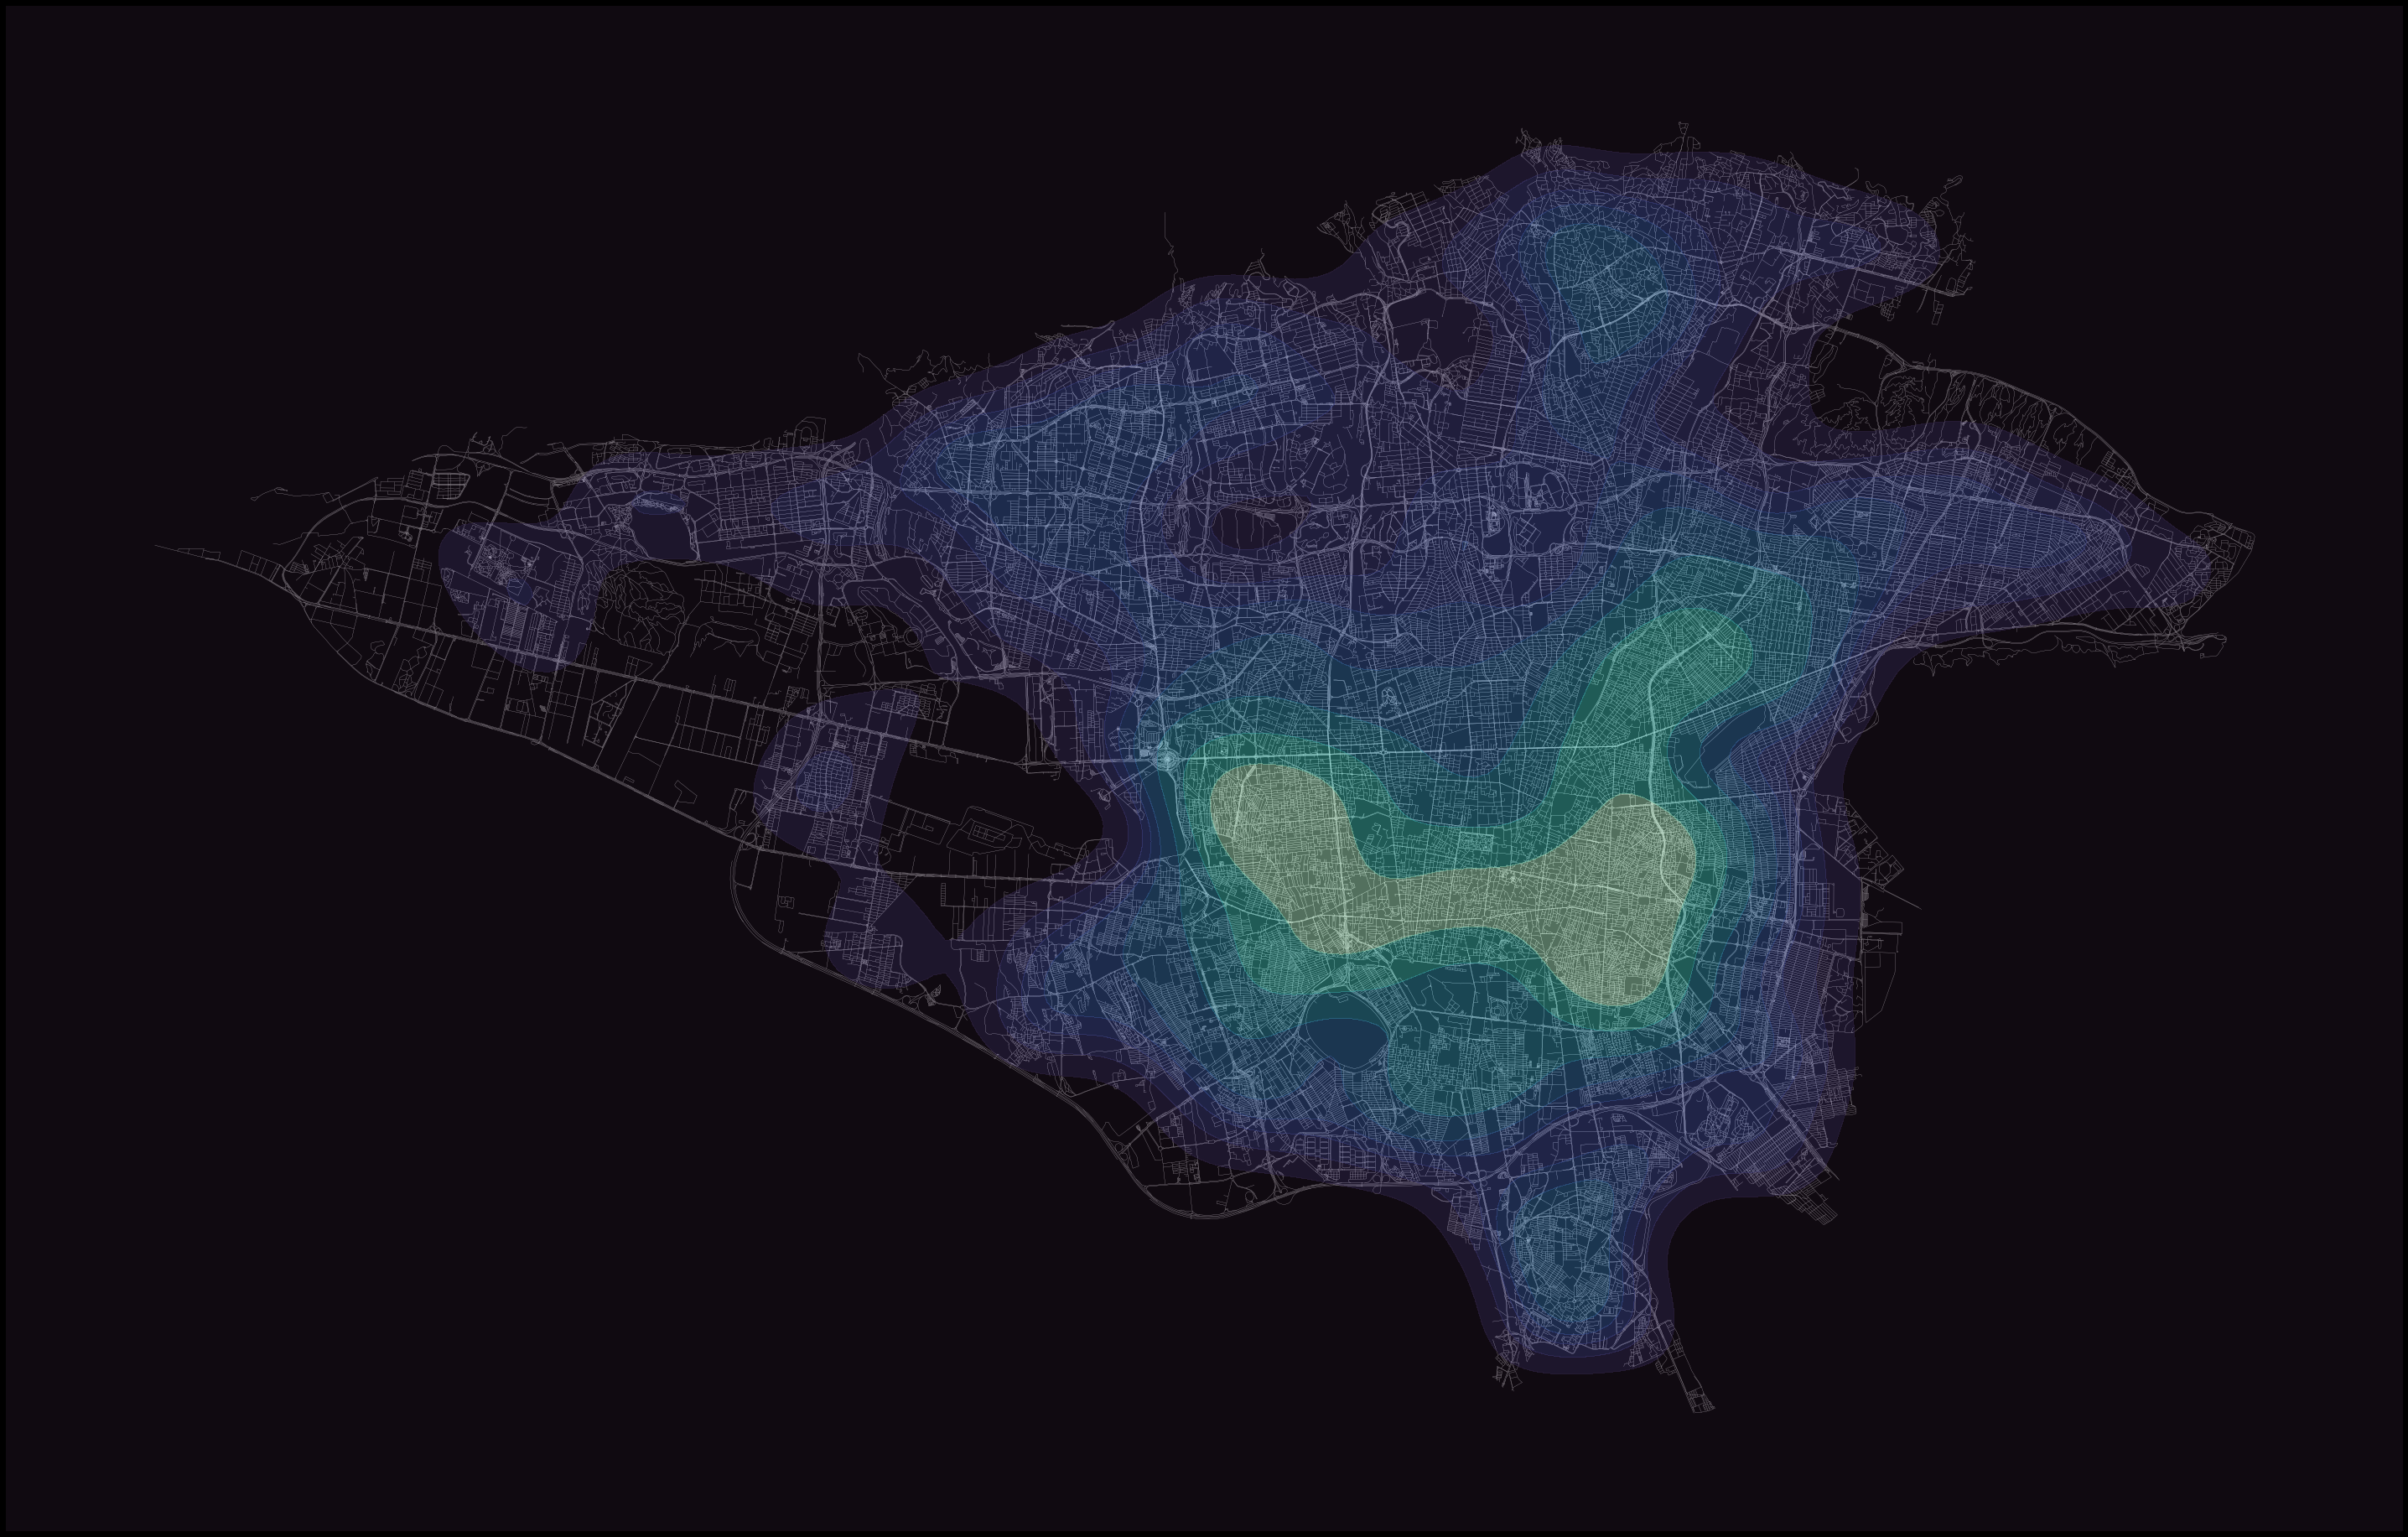

In [ ]:
# Setup plot
#Seaborn’s kernel density estimate (KDE)
fig, ax = plt.subplots(figsize=(40,40))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot streets underneath
edges_s_tehran.plot(ax=ax, color=[1,1,1], linewidth=0.2, zorder= 0)

# Plot KDE on top
sns.kdeplot(
    ax=ax,
    data=nodes_s_tehran,
    x='x', y='y',
    hue=None,
    fill=True,
    cmap='mako',
    thresh=0,
    levels=10,
    alpha=0.6,
    zorder=10
)

# Tight layout
plt.tight_layout()

In [ ]:
# Select points of interest based on osm tags
tags = {
    'amenity':[
        'cafe',
        'restaurant'
    ],
    'shop':[
        'bakery',
        'convenience',
        'supermarket',
        'mall',
        'department_store',
        'clothes',
        'shoes'
    ],
    'leisure':[
        'fitness_centre'
    ]
}

# Get amentities from place
pois = ox.geometries.geometries_from_place('Tehran, Iran', tags=tags)

# # Project pois
pois = pois.to_crs(epsg=4326)

In [ ]:
# Select points of interest based on osm tags
tags = {
    'amenity':[
        'cafe',
        'restaurant'
    ],
    'shop':[
        'bakery',
        'convenience',
        'supermarket',
        'mall',
        'clothes',
        'shoes'
    ],
    'leisure':[
        'fitness_centre'
    ]
}

# Get amentities from place
pois = ox.geometries.geometries_from_place('Tehran, Iran', tags=tags)
    # 'crs': 'epsg:4326'
# # Project pois
pois = pois.to_crs(epsg=4326)

In [ ]:
# Max time to walk in minutes (no routing to nodes further than this)
walk_time = 15

# Walking speed
walk_speed = 4.5

# Set a uniform walking speed on every edge
for u, v, data in graph_tehran.edges(data=True):
    data['speed_kph'] = walk_speed
graph_Teh_15 = ox.add_edge_travel_times(graph_tehran)

# Extract node/edge GeoDataFrames, retaining only necessary columns (for pandana)
nodes = ox.graph_to_gdfs(graph_Teh_15, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(graph_Teh_15, nodes=False).reset_index()[['u', 'v', 'travel_time']]

In [ ]:
# Construct the pandana network model

import pandana
network = pandana.Network(
    node_x=nodes['x'],
    node_y=nodes['y'],
    edge_from=edges['u'],
    edge_to=edges['v'],
    edge_weights=edges[['travel_time']]
)

# Extract centroids from the pois' geometries
centroids = pois.centroid

<ipython-input-24-b3e577d4cc70>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = pois.centroid


In [ ]:
# Specify a max travel distance for analysis
# Minutes -> seconds
maxdist = walk_time * 60

# Set the pois' locations on the network
network.set_pois(
    category='pois',
    maxdist=maxdist,
    maxitems=10,
    x_col=centroids.x,
    y_col=centroids.y
)

/usr/local/lib/python3.8/dist-packages/pandana/network.py:660: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/usr/local/lib/python3.8/dist-packages/pandana/network.py:668: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


In [ ]:
# calculate travel time to 10 nearest pois from each
in network
distances = network.nearest_pois(
    distance=maxdist,
    category='pois',
    num_pois=10
)

distances.astype(int).head()

1    2    3    4    5    6    7    8    9    10
osmid                                                     
25920665  176  184  223  379  511  518  579  620  639  645
25920706  339  381  412  534  537  537  537  565  575  586
25920707  131  155  232  277  282  282  282  331  338  446
25920714   50   50   97  147  221  262  264  305  305  310
25920715  169  223  461  461  474  508  517  527  528  537

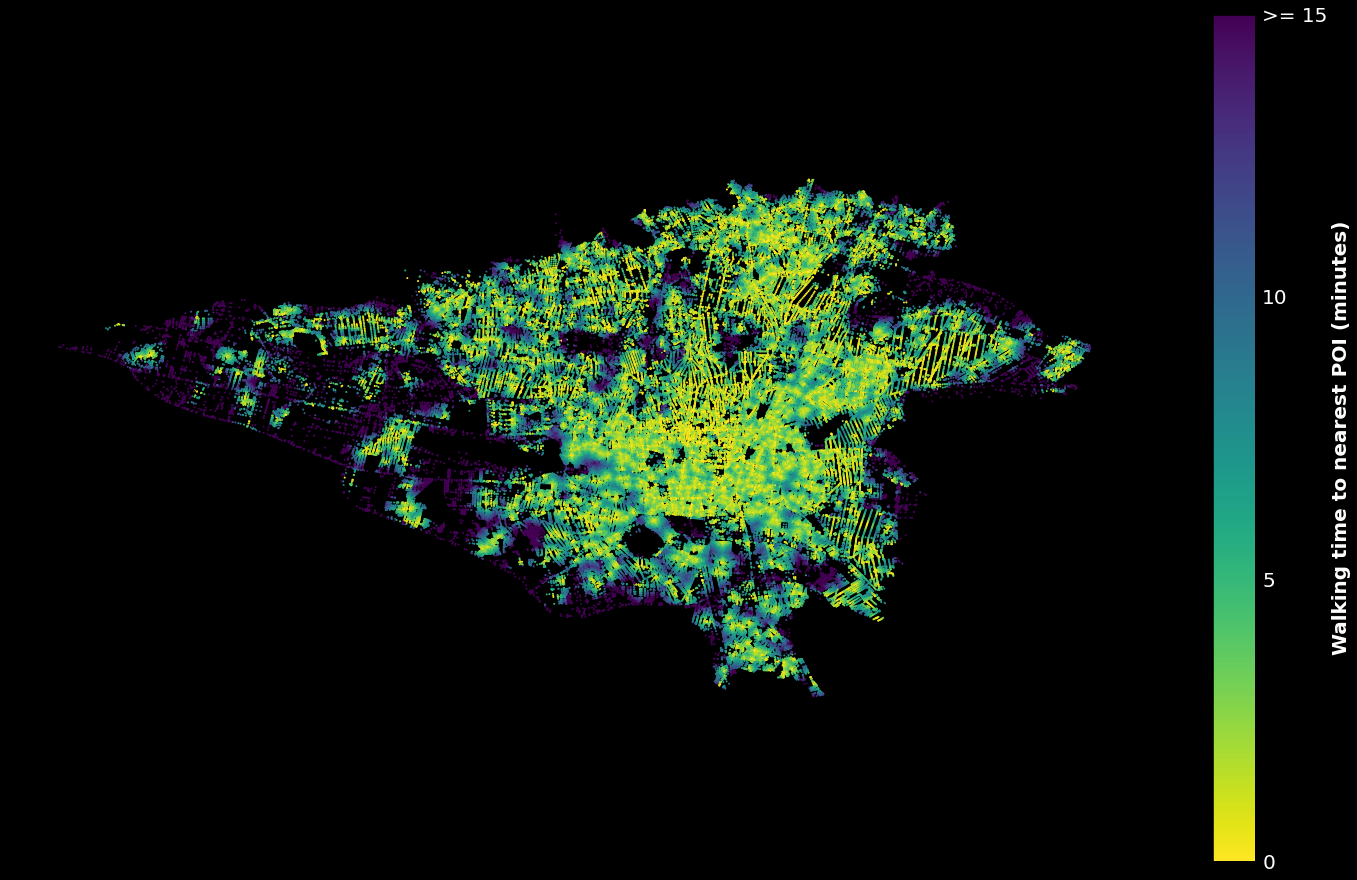

In [ ]:
# Set text parameters

import matplotlib.pyplot as plt
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor((0,0,0))

# Plot distance to nearest POI
sc = ax.scatter(
    x=nodes['x'],
    y=nodes['y'],
    c=distances[1],
    s=1,
    cmap='viridis_r',
)

# Colorbar
cb = fig.colorbar(sc, ax=ax, shrink=0.8, ticks=[0, 300, 600, 900])
cb.ax.tick_params(color='none', labelsize=20)
cb.ax.set_yticklabels(['0', '5', '10', '>= 15'])
cb.set_label('Walking time to nearest POI (minutes)', fontsize=20, fontweight='bold')

# Remove empty space
plt.tight_layout()

# Save
plt.savefig('/content/walk_access.png')

<ipython-input-28-be8347787f85>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


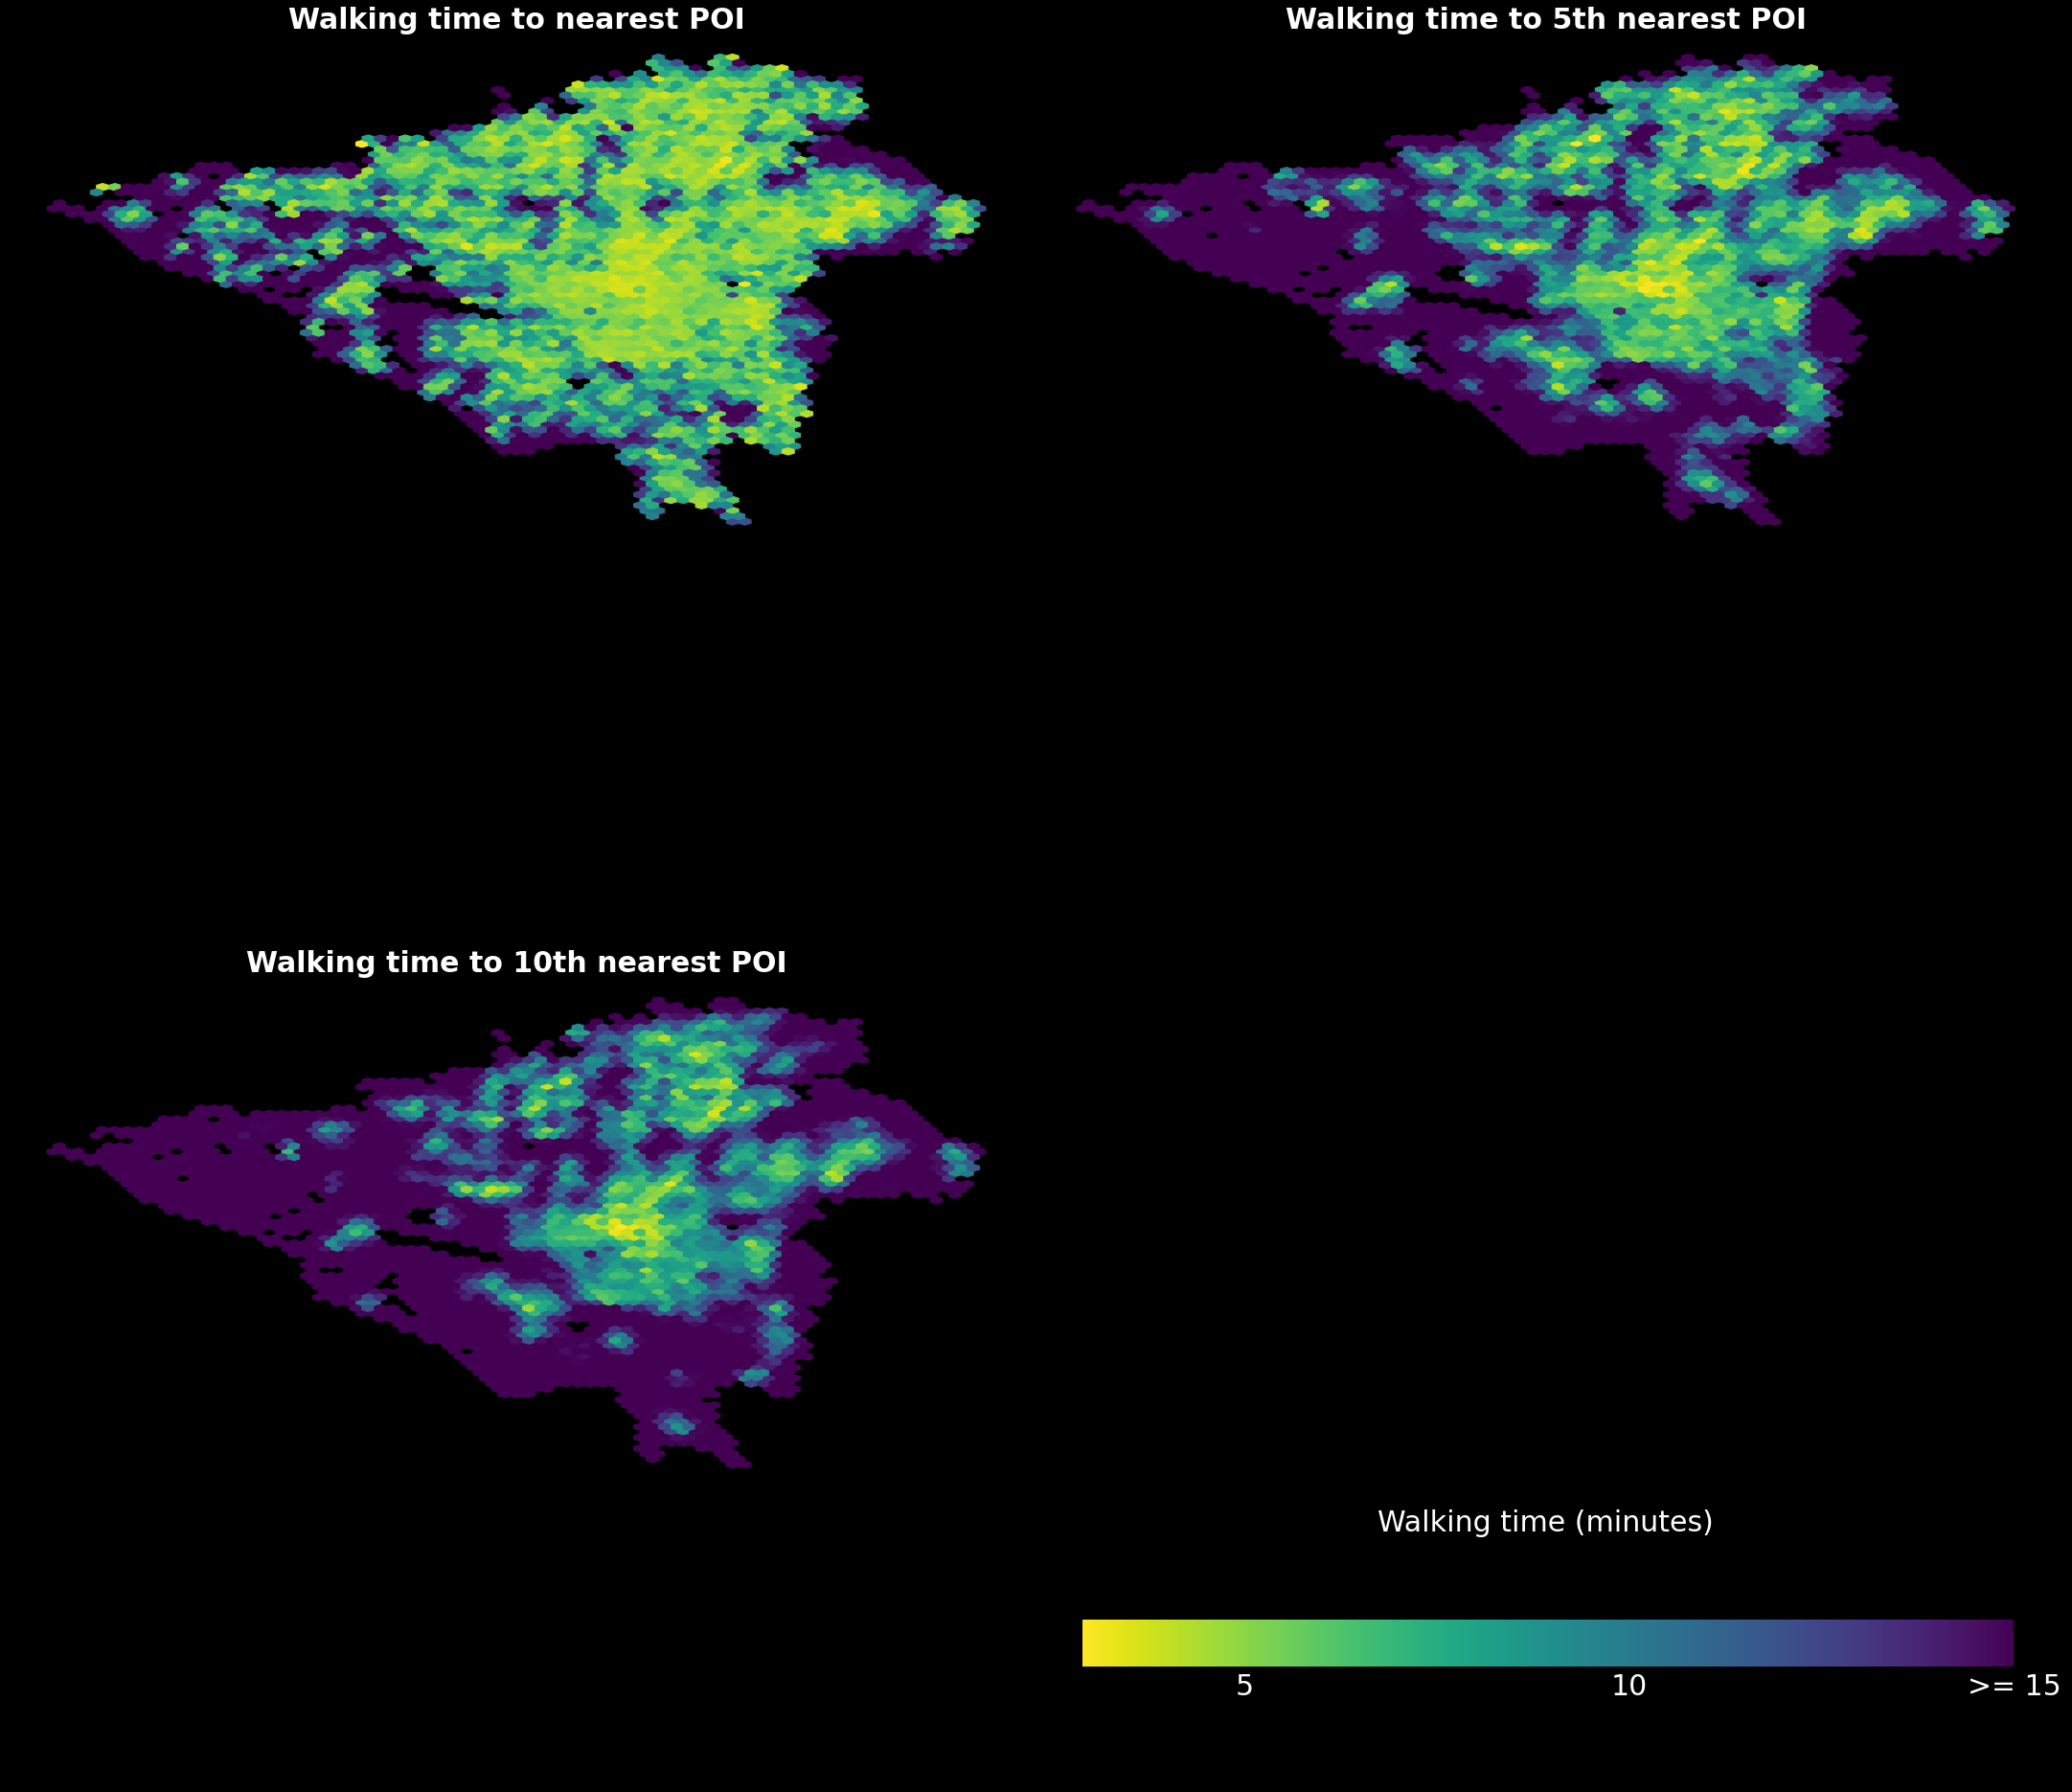

In [ ]:
# Setup plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,30), constrained_layout=False)
ax[0][0].set_axis_off()
ax[0][1].set_axis_off()
ax[1][0].set_axis_off()
ax[1][1].set_axis_off()
ax[0][0].set_aspect('equal')
ax[0][1].set_aspect('equal')
ax[1][0].set_aspect('equal')

# Specify colors
fig.set_facecolor('black')
cmap = 'viridis_r'

# Plot distance to nearest POI
hb = ax[0][0].hexbin(
    x=nodes['x'],
    y=nodes['y'],
    gridsize=75,
    cmap=cmap,
    C=distances[1],
    alpha=1
)

# Plot distance to 5th nearest POI
hb = ax[0][1].hexbin(
    x=nodes['x'],
    y=nodes['y'],
    gridsize=75,
    cmap=cmap,
    C=distances[5],
    alpha=1
)

# Plot distance to 10th nearest POI
hb = ax[1][0].hexbin(
    x=nodes['x'],
    y=nodes['y'],
    gridsize=75,
    cmap=cmap,
    C=distances[10],
    alpha=1
)

# Add titles to maps
ax[0][0].set_title('Walking time to nearest POI', fontsize=30, fontweight='bold')
ax[0][1].set_title('Walking time to 5th nearest POI', fontsize=30, fontweight='bold')
ax[1][0].set_title('Walking time to 10th nearest POI', fontsize=30, fontweight='bold')

# Setup color bar axis (location of color bar)
cbar_ax = fig.add_axes([0.5, 0.01, 0.5, 0.5])
cbar_ax.set_axis_off()

# Color bar properties
cb = plt.colorbar(
    hb,
    ax=cbar_ax,
    shrink=0.9,
    ticks=[82, 300, 600, 900],
    orientation='horizontal',
    aspect=20
)
cb.outline.set_edgecolor('none')
cb.ax.tick_params(color='none', labelsize=30)
cb.ax.set_xticklabels(['<= 1', '5', '10', '>= 15'])

# Title for color bar
ax[1][1].text(0.5, 0.23, 'Walking time (minutes)', fontsize=30, ha='center')

# Tight layout
plt.tight_layout()

